In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [5]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4) # makes blobs in different coordinates of the grid
# print(X)
# print(y)

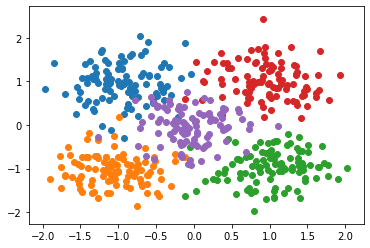

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [7]:
# implementing hot coding process
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [8]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 236us/step - loss: 1.4385 - accuracy: 0.4480
Epoch 2/100
500/500 [==============================] - 0s 22us/step - loss: 0.7068 - accuracy: 0.7560
Epoch 3/100
500/500 [==============================] - 0s 36us/step - loss: 0.4556 - accuracy: 0.8900
Epoch 4/100
500/500 [==============================] - 0s 20us/step - loss: 0.3529 - accuracy: 0.9380
Epoch 5/100
500/500 [==============================] - 0s 44us/step - loss: 0.3025 - accuracy: 0.9400
Epoch 6/100
500/500 [==============================] - 0s 16us/step - loss: 0.2756 - accuracy: 0.9400
Epoch 7/100
500/500 [==============================] - 0s 34us/step - loss: 0.2544 - accuracy: 0.9420
Epoch 8/100
500/500 [==============================] - 0s 45us/step - loss: 0.2405 - accuracy: 0.9420
Epoch 9/100
500/500 [==============================] - 0s 29us/step - loss: 0.2295 - accuracy: 0.9420
Epoch 10/100
500/500 [==============================] - 0s 50us/step - loss: 0.22

In [10]:
# We are going to plot our data set along with the precis decision boundray that will separate our 
# categorical results. The equation for this decisive boundary layer is obtained directly from the
# NN after it goes through the entire training procedure.
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

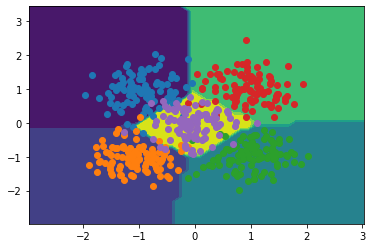

In [11]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

Prediction is  [3]


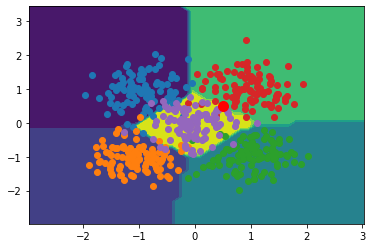

In [12]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.5
y = 0.5
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="r")
print("Prediction is ", prediction)

Prediction is  [4]


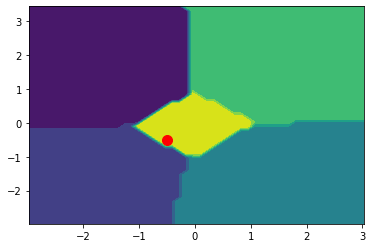

In [15]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = -0.5
y = -0.5
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="r")
print("Prediction is ", prediction)